In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from scipy import stats

In [83]:
df = pd.read_csv('survey_responses.csv')

In [84]:
df

,How many hours/week did you spend on SGO 1 during your first semester at Harvard?,How many hours/week do you still spend on SGO 1 now?,How many hours/week did you spend on SGO 2 during your first semester at Harvard?,How many hours/week do you still spend on SGO 2 now?,How many hours/week did you spend on SGO 3 during your first semester at Harvard?,How many hours/week do you still spend on SGO 3 now?,How many hours/week did you spend on SGO 4 during your first semester at Harvard?,How many hours/week do you still spend on SGO 4 now?,How many hours/week did you spend on SGO 5 during your first semester at Harvard?,How many hours/week do you still spend on SGO 5 now?,How many semesters have you completed at Harvard (not including this fall)?
0,5,10,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,3,10,5.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2
3,0,6,3.0,3.0,1.0,1.0,0.0,4.0,NaN,NaN,2
4,10,0,6.0,0.0,1.0,5.0,NaN,NaN,NaN,NaN,2
5,3,3,5.0,5.0,7.0,3.0,2.0,5.0,3.0,3.0,4
6,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8,0,10,2.0,6.0,0.0,2.0,NaN,NaN,NaN,NaN,4
9,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [85]:
df.values

array([[  5.,  10.,   3.,   0.,  nan,  nan,  nan,  nan,  nan,  nan,   4.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.],
       [  3.,  10.,   5.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   2.],
       [  0.,   6.,   3.,   3.,   1.,   1.,   0.,   4.,  nan,  nan,   2.],
       [ 10.,   0.,   6.,   0.,   1.,   5.,  nan,  nan,  nan,  nan,   2.],
       [  3.,   3.,   5.,   5.,   7.,   3.,   2.,   5.,   3.,   3.,   4.],
       [ 10.,  10.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,   6.],
       [  1.,   3.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,   2.],
       [  0.,  10.,   2.,   6.,   0.,   2.,  nan,  nan,  nan,  nan,   4.],
       [ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.],
       [  5.,  10.,   3.,  10.,   2.,   0.,   3.,   3.,   0.,   2.,   2.],
       [  1.,   0.,   1.,   0.,  nan,  nan,  nan,  nan,  nan,  nan,   4.],
       [  3.,   0.,   0.,   2.,   4.,   1.,  nan,  nan,  nan,  nan,   2.],
       [  7.,   9.,   0.,

In [86]:
column_names = ['time_first_semester', 'time_now', 'num_of_semesters']

In [87]:
sgo_data = pd.DataFrame(columns=column_names)
sgo_data

,time_first_semester,time_now,num_of_semesters


In [148]:
relevant_data = []
for response in df.values:
    for i in range(5):
        if not pd.isnull(response[i]) and response[i]:
            if pd.isnull(response[i+1]):
                response[i+1] = 0
            relevant_data.append([response[i], response[i+1], response[-1]])
relevant_data = np.array(relevant_data)

In [159]:
relevant_data

array([[  5.,  10.,   4.],
       [ 10.,   3.,   4.],
       [  3.,   0.,   4.],
       [  3.,  10.,   2.],
       [ 10.,   5.,   2.],
       [  5.,   0.,   2.],
       [  6.,   0.,   2.],
       [  6.,   3.,   2.],
       [  3.,   3.,   2.],
       [  3.,   1.,   2.],
       [  1.,   1.,   2.],
       [ 10.,   0.,   2.],
       [  6.,   0.,   2.],
       [  1.,   5.,   2.],
       [  3.,   3.,   4.],
       [  3.,   5.,   4.],
       [  5.,   5.,   4.],
       [  5.,   7.,   4.],
       [  7.,   3.,   4.],
       [ 10.,  10.,   6.],
       [ 10.,   0.,   6.],
       [  1.,   3.,   2.],
       [  3.,   0.,   2.],
       [ 10.,   2.,   4.],
       [  2.,   6.,   4.],
       [  6.,   0.,   4.],
       [ 10.,   0.,   4.],
       [  5.,  10.,   2.],
       [ 10.,   3.,   2.],
       [  3.,  10.,   2.],
       [ 10.,   2.,   2.],
       [  2.,   0.,   2.],
       [  1.,   0.,   4.],
       [  1.,   0.,   4.],
       [  3.,   0.,   2.],
       [  2.,   4.,   2.],
       [  4.,   1.,   2.],
 

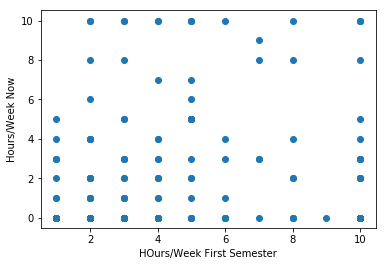

In [151]:
plt.scatter(relevant_data[:,0], relevant_data[:,1])
plt.ylabel('Hours/Week Now')
plt.xlabel('HOurs/Week First Semester')
plt.show()

In [160]:
time_now = [ [] for _ in range(10)]
time_now

[[], [], [], [], [], [], [], [], [], []]

In [162]:
for sgo in relevant_data:
    time_now[int(sgo[0])-1].append(sgo[1])

In [163]:
time_now

[[1.0,
  5.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.0,
  1.0,
  2.0,
  0.0,
  3.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [6.0,
  0.0,
  4.0,
  0.0,
  0.0,
  8.0,
  0.0,
  0.0,
  2.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  10.0,
  0.0,
  1.0,
  0.0,
  1.0,
  2.0,
  1.0,
  4.0,
  2.0,
  2.0,
  2.0,
  10.0,
  4.0,
  1.0],
 [0.0,
  10.0,
  3.0,
  1.0,
  3.0,
  5.0,
  0.0,
  10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  8.0,
  2.0,
  5.0,
  3.0,
  1.0,
  0.0,
  2.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0],
 [1.0,
  3.0,
  7.0,
  10.0,
  4.0,
  2.0,
  0.0,
  2.0,
  2.0,
  0.0,
  4.0,
  3.0,
  0.0,
  0.0,
  0.0,
  10.0,
  1.0,
  0.0],
 [10.0,
  0.0,
  5.0,
  7.0,
  10.0,
  6.0,
  0.0,
  2.0,
  5.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  3.0,
  10.0,
  0.0,
  0.0,
  2.0],
 [0.0, 3.0, 0.0, 0.0, 1.0, 10.0, 4.0, 0.0],
 [3.0, 9.0, 0.0, 3.0, 8.0],
 [10.0, 0.0, 2.0, 8.0, 2.0, 0.0, 4.0, 0.0],
 [0.0],
 [3.0,
  5.0,
  0.0,
  10.0,
  0.0,
  2.0,
  0.0,
  3.0,
  2.0,
  8.0,


In [164]:
np.array(time_now)

array([ list([1.0, 5.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 1.0, 2.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0]),
       list([6.0, 0.0, 4.0, 0.0, 0.0, 8.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0, 0.0, 0.0, 10.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1.0, 4.0, 2.0, 2.0, 2.0, 10.0, 4.0, 1.0]),
       list([0.0, 10.0, 3.0, 1.0, 3.0, 5.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 2.0, 5.0, 3.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0]),
       list([1.0, 3.0, 7.0, 10.0, 4.0, 2.0, 0.0, 2.0, 2.0, 0.0, 4.0, 3.0, 0.0, 0.0, 0.0, 10.0, 1.0, 0.0]),
       list([10.0, 0.0, 5.0, 7.0, 10.0, 6.0, 0.0, 2.0, 5.0, 5.0, 5.0, 5.0, 1.0, 5.0, 3.0, 10.0, 0.0, 0.0, 2.0]),
       list([0.0, 3.0, 0.0, 0.0, 1.0, 10.0, 4.0, 0.0]),
       list([3.0, 9.0, 0.0, 3.0, 8.0]),
       list([10.0, 0.0, 2.0, 8.0, 2.0, 0.0, 4.0, 0.0]), list([0.0]),
       list([3.0, 5.0, 0.0, 10.0, 0.0, 2.0, 0.0, 3.0, 2.0, 8.0, 10.0, 3.0, 3.0, 4.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 0.0])], dtype=object)

In [165]:
average_time_now = list(map(lambda x: np.mean(x), time_now))

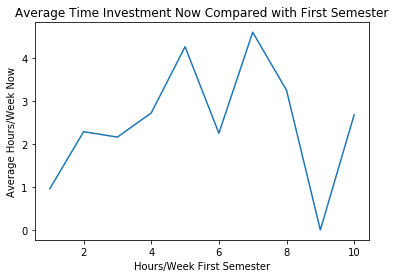

In [167]:
plt.plot(range(1,11), average_time_now)
plt.ylabel('Average Hours/Week Now')
plt.xlabel('Hours/Week First Semester')
plt.title('Average Time Investment Now Compared with First Semester')
plt.savefig('average_without_zero.png')
plt.show()

In [168]:
percent_dropped = list(map(lambda x: (1 - np.count_nonzero(x)/len(x)) * 100, time_now))

In [169]:
percent_dropped

[65.21739130434783,
 39.28571428571429,
 48.0,
 33.333333333333336,
 21.052631578947366,
 50.0,
 19.999999999999996,
 37.5,
 100.0,
 43.99999999999999]

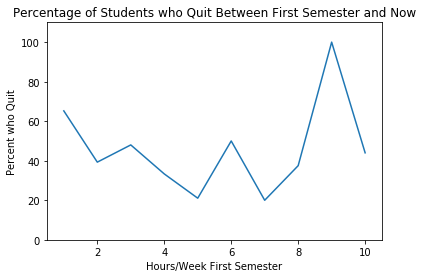

In [196]:
plt.plot(range(1,11), percent_dropped)
plt.ylabel('Percent who Quit')
plt.xlabel('Hours/Week First Semester')
plt.title('Percentage of Students who Quit Between First Semester and Now')
plt.axis([.5, 10.5, 0, 110])
plt.savefig('percent_who_quit_without_zero.png')
plt.show()

In [172]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(relevant_data[:,0].reshape(-1,1), relevant_data[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
bubble_counts = np.zeros((11,11))
relevant_data2 = list(map(lambda x: [ int(y) for y in x], relevant_data))
relevant_data2

[[5, 10, 4],
 [10, 3, 4],
 [3, 0, 4],
 [3, 10, 2],
 [10, 5, 2],
 [5, 0, 2],
 [6, 0, 2],
 [6, 3, 2],
 [3, 3, 2],
 [3, 1, 2],
 [1, 1, 2],
 [10, 0, 2],
 [6, 0, 2],
 [1, 5, 2],
 [3, 3, 4],
 [3, 5, 4],
 [5, 5, 4],
 [5, 7, 4],
 [7, 3, 4],
 [10, 10, 6],
 [10, 0, 6],
 [1, 3, 2],
 [3, 0, 2],
 [10, 2, 4],
 [2, 6, 4],
 [6, 0, 4],
 [10, 0, 4],
 [5, 10, 2],
 [10, 3, 2],
 [3, 10, 2],
 [10, 2, 2],
 [2, 0, 2],
 [1, 0, 4],
 [1, 0, 4],
 [3, 0, 2],
 [2, 4, 2],
 [4, 1, 2],
 [7, 9, 2],
 [9, 0, 2],
 [7, 0, 2],
 [5, 6, 4],
 [6, 1, 4],
 [1, 0, 4],
 [2, 0, 2],
 [3, 0, 2],
 [10, 8, 2],
 [8, 10, 2],
 [10, 10, 2],
 [10, 3, 2],
 [3, 0, 2],
 [6, 10, 6],
 [10, 3, 6],
 [3, 0, 6],
 [2, 0, 6],
 [1, 0, 2],
 [1, 0, 2],
 [10, 4, 6],
 [4, 3, 6],
 [3, 0, 6],
 [10, 0, 6],
 [5, 0, 8],
 [5, 2, 8],
 [2, 8, 8],
 [8, 0, 8],
 [3, 8, 2],
 [8, 2, 2],
 [2, 0, 2],
 [4, 7, 6],
 [7, 3, 6],
 [3, 2, 6],
 [2, 0, 6],
 [6, 4, 4],
 [4, 10, 4],
 [10, 0, 4],
 [2, 2, 4],
 [3, 5, 2],
 [5, 5, 2],
 [5, 5, 2],
 [5, 5, 2],
 [5, 5, 2],
 [4, 4, 6],
 [4

In [186]:
for pt in relevant_data2:
    bubble_counts[pt[0]-1, pt[1]] += 1

In [187]:
bubble_counts

array([[ 15.,   2.,   1.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
       [ 41.,   8.,   7.,   6.,   6.,   2.,   1.,   0.,   1.,   0.,   2.],
       [ 34.,  11.,  12.,   3.,   8.,   2.,   2.,   0.,   3.,   0.,   6.],
       [ 30.,   8.,   7.,   8.,   2.,   4.,   0.,   1.,   2.,   0.,   6.],
       [ 16.,   5.,   8.,   5.,   4.,   6.,   1.,   3.,   0.,   0.,   7.],
       [ 12.,   3.,   4.,   3.,   1.,  12.,   2.,   2.,   0.,   0.,   7.],
       [  9.,   2.,   0.,   4.,   2.,   0.,   0.,   0.,   1.,   1.,   2.],
       [  5.,   0.,   2.,   4.,   1.,   0.,   0.,   0.,   3.,   2.,   1.],
       [  7.,   0.,   4.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   2.],
       [ 13.,   0.,   4.,   4.,   1.,   1.,   0.,   0.,   1.,   0.,   3.],
       [ 22.,   0.,   8.,   8.,   2.,   2.,   0.,   0.,   2.,   0.,   6.]])

In [188]:
xs = np.array([[x] * 11 for x in range(1,11)]).flatten()
ys = np.array([range(11)] * 10).flatten()
xs

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10])

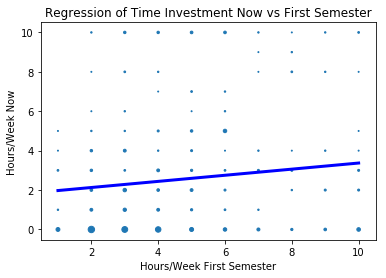

In [189]:
plt.plot(range(1,11), regr.predict(np.array(range(1,11)).reshape(-1,1)), color='blue', linewidth=3)
plt.scatter(xs, ys, bubble_counts.flatten())
plt.xlabel('Hours/Week First Semester')
plt.ylabel('Hours/Week Now')
plt.title('Regression of Time Investment Now vs First Semester')
plt.savefig('linear_regression_without_zero.png')
plt.show()

In [129]:
class LinearRegression2(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression2, self).__init__()

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression2, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

In [130]:
reg = LinearRegression2()

In [131]:
relevant_data[:,0].reshape(-1,1).shape

(270, 1)

In [132]:
reg.fit(relevant_data[:,0].reshape(-1,1), relevant_data[:,1].reshape(-1,1))

RuntimeError: scikit-learn estimators should always specify their parameters in the signature of their __init__ (no varargs). <class '__main__.LinearRegression2'> with constructor (self, *args, **kwargs) doesn't  follow this convention.

In [140]:
relevant_data[:,:2]

array([[  5.,  10.],
       [ 10.,   3.],
       [  3.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  3.,  10.],
       [ 10.,   5.],
       [  5.,   0.],
       [  0.,   6.],
       [  6.,   0.],
       [  0.,   6.],
       [  6.,   3.],
       [  3.,   3.],
       [  3.,   1.],
       [  1.,   1.],
       [ 10.,   0.],
       [  0.,   6.],
       [  6.,   0.],
       [  0.,   1.],
       [  1.,   5.],
       [  3.,   3.],
       [  3.,   5.],
       [  5.,   5.],
       [  5.,   7.],
       [  7.,   3.],
       [ 10.,  10.],
       [ 10.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  1.,   3.],
       [  3.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,  10.],
       [ 10.,   2.],
       [  2.,   6.],
       [  6.,   0.],
       [  0.,   2.],
       [ 10.,   0.],
       [  0.,   0.],
       [  0.,

In [191]:
np.corrcoef(relevant_data[:,0], relevant_data[:,1])

array([[ 1.        ,  0.14777773],
       [ 0.14777773,  1.        ]])